In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis

In [4]:
df=pd.read_csv("CarPrice_Assignment.csv")

df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# Find duplicate rows based on all columns
duplicates = df[df.duplicated()]

# Print the duplicate rows
print(duplicates)


Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]


In [7]:
unique_values = {}  # Create a dictionary to store unique values and their lengths

for column in df.columns:
    unique = df[column].unique()  # Get unique values for the column
    length = len(unique)  # Get the length of unique values
    unique_values[column] = {"unique_values": unique, "length": length}

# Print the unique values and their lengths for each feature
for column, values in unique_values.items():
    print(f"Feature: {column}")
    print(f"Unique Values: {values['unique_values']}")
    print(f"Number of Unique Values: {values['length']}")
    print()


Feature: car_ID
Unique Values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
Number of Unique Values: 205

Feature: symboling
Unique Values: [ 3  1  2  0 -1 -2]
Number of Unique Values: 6

Feature: CarName
Unique 

In [8]:
df["price"].describe()


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_8440\4191608645.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"],color='r')


<Axes: xlabel='price', ylabel='Density'>

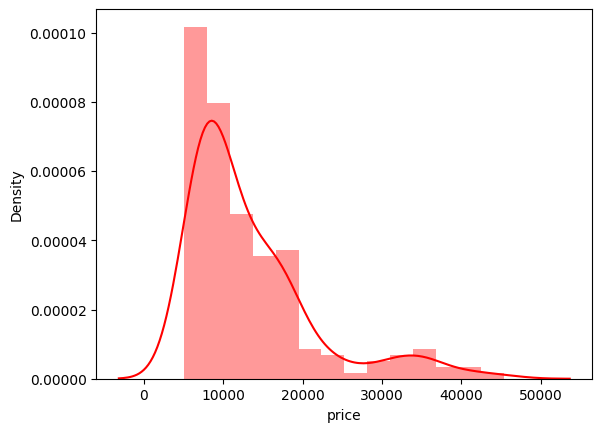

In [9]:
sns.distplot(df["price"],color='r')


C:\Users\User\AppData\Local\Temp\ipykernel_8440\457968066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(np.log(np.log(df["price"]))),color='r')


<Axes: xlabel='price', ylabel='Density'>

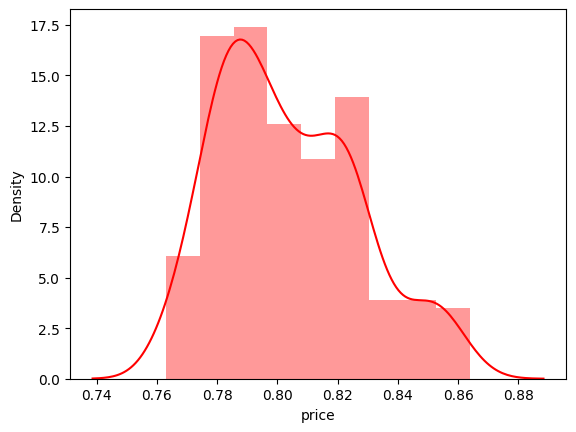

In [10]:
sns.distplot(np.log(np.log(np.log(df["price"]))),color='r')


<Axes: >

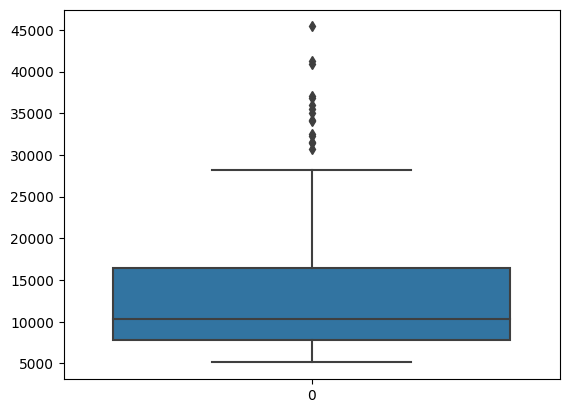

In [11]:
sns.boxplot(df["price"])


In [13]:
q1=df.price.quantile(0.25)
q1

7788.0

In [15]:
q3=df.price.quantile(0.75)
q3

16503.0

In [16]:
IQR=q3-q1 
IQR

8715.0

In [17]:
lower=q1-1.5*IQR
upper=q3+1.5*IQR

lower,upper

(-5284.5, 29575.5)

In [22]:
df2=df[(df.price<lower) | (df.price>upper)] 
df2

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0


<Axes: >

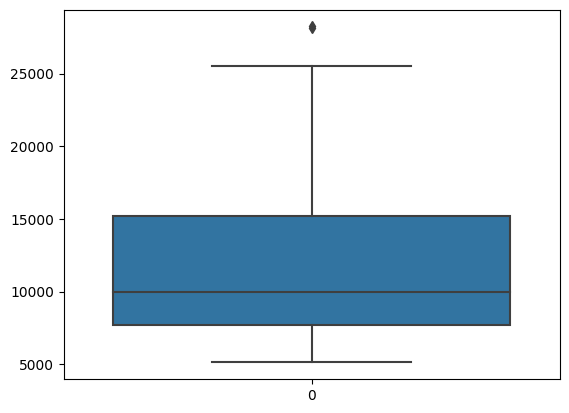

In [54]:

df_new = df[df['price'] <= upper]
sns.boxplot(df_new['price'])

In [55]:
df_new

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [60]:
unique_values = {}  # Create a dictionary to store unique values and their lengths

for column in df_new.columns:
    unique = df[column].unique()  # Get unique values for the column
    length = len(unique)  # Get the length of unique values
    unique_values[column] = {"unique_values": unique, "length": length}

# Print the unique values and their lengths for each feature
for column, values in unique_values.items():
    print(f"Feature: {column}")
    print(f"Unique Values: {values['unique_values']}")
    print(f"Number of Unique Values: {values['length']}")
    print()


Feature: car_ID
Unique Values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
Number of Unique Values: 205

Feature: symboling
Unique Values: [ 3  1  2  0 -1 -2]
Number of Unique Values: 6

Feature: CarName
Unique 

In [31]:
df2.price.describe()


count       15.000000
mean     35662.633333
std       4172.232404
min      30760.000000
25%      32389.000000
50%      35056.000000
75%      36954.000000
max      45400.000000
Name: price, dtype: float64

ENCODING

In [63]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in df_new[["CarName","fueltype","aspiration","doornumber","carbody","drivewheel","fuelsystem","enginetype","cylindernumber"]]:
    df_new[i] = label_encoder.fit_transform(df_new[i])
df_new

C:\Users\User\AppData\Local\Temp\ipykernel_8440\1740457714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i] = label_encoder.fit_transform(df_new[i])
C:\Users\User\AppData\Local\Temp\ipykernel_8440\1740457714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i] = label_encoder.fit_transform(df_new[i])
C:\Users\User\AppData\Local\Temp\ipykernel_8440\1740457714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,126,1,0,0,3,2,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,125,1,1,0,3,2,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,127,1,0,0,3,2,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,129,0,1,0,3,2,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [64]:
#Finding Correlated columns
corr_columns=[]
for i in df_new.columns:
    corr2=df_new[[i,'price']].corr()
    print(i,corr2.iloc[0][1].round(1))
    if abs(corr2.iloc[0][1])>0.5:
         corr_columns.append(i)
print("Correlated columns : ",corr_columns)
df_corr=df_new[corr_columns]
df_corr

car_ID 0.0
symboling -0.1
CarName -0.1
fueltype -0.2
aspiration 0.4
doornumber -0.1
carbody 0.1
drivewheel 0.5
wheelbase 0.7
carlength 0.7
carwidth 0.8
carheight 0.3
curbweight 0.9
enginetype -0.0
cylindernumber 0.0
enginesize 0.7
fuelsystem 0.6
boreratio 0.5
stroke 0.1
compressionratio 0.2
horsepower 0.7
peakrpm -0.1
citympg -0.7
highwaympg -0.7
price 1.0
Correlated columns :  ['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'horsepower', 'citympg', 'highwaympg', 'price']


,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg,price
0,2,88.6,168.8,64.1,2548,130,5,111,21,27,13495.0
1,2,88.6,168.8,64.1,2548,130,5,111,21,27,16500.0
2,2,94.5,171.2,65.5,2823,152,5,154,19,26,16500.0
3,1,99.8,176.6,66.2,2337,109,5,102,24,30,13950.0
4,0,99.4,176.6,66.4,2824,136,5,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,2,109.1,188.8,68.9,2952,141,5,114,23,28,16845.0
201,2,109.1,188.8,68.8,3049,141,5,160,19,25,19045.0
202,2,109.1,188.8,68.9,3012,173,5,134,18,23,21485.0
203,2,109.1,188.8,68.9,3217,145,3,106,26,27,22470.0


<Axes: >

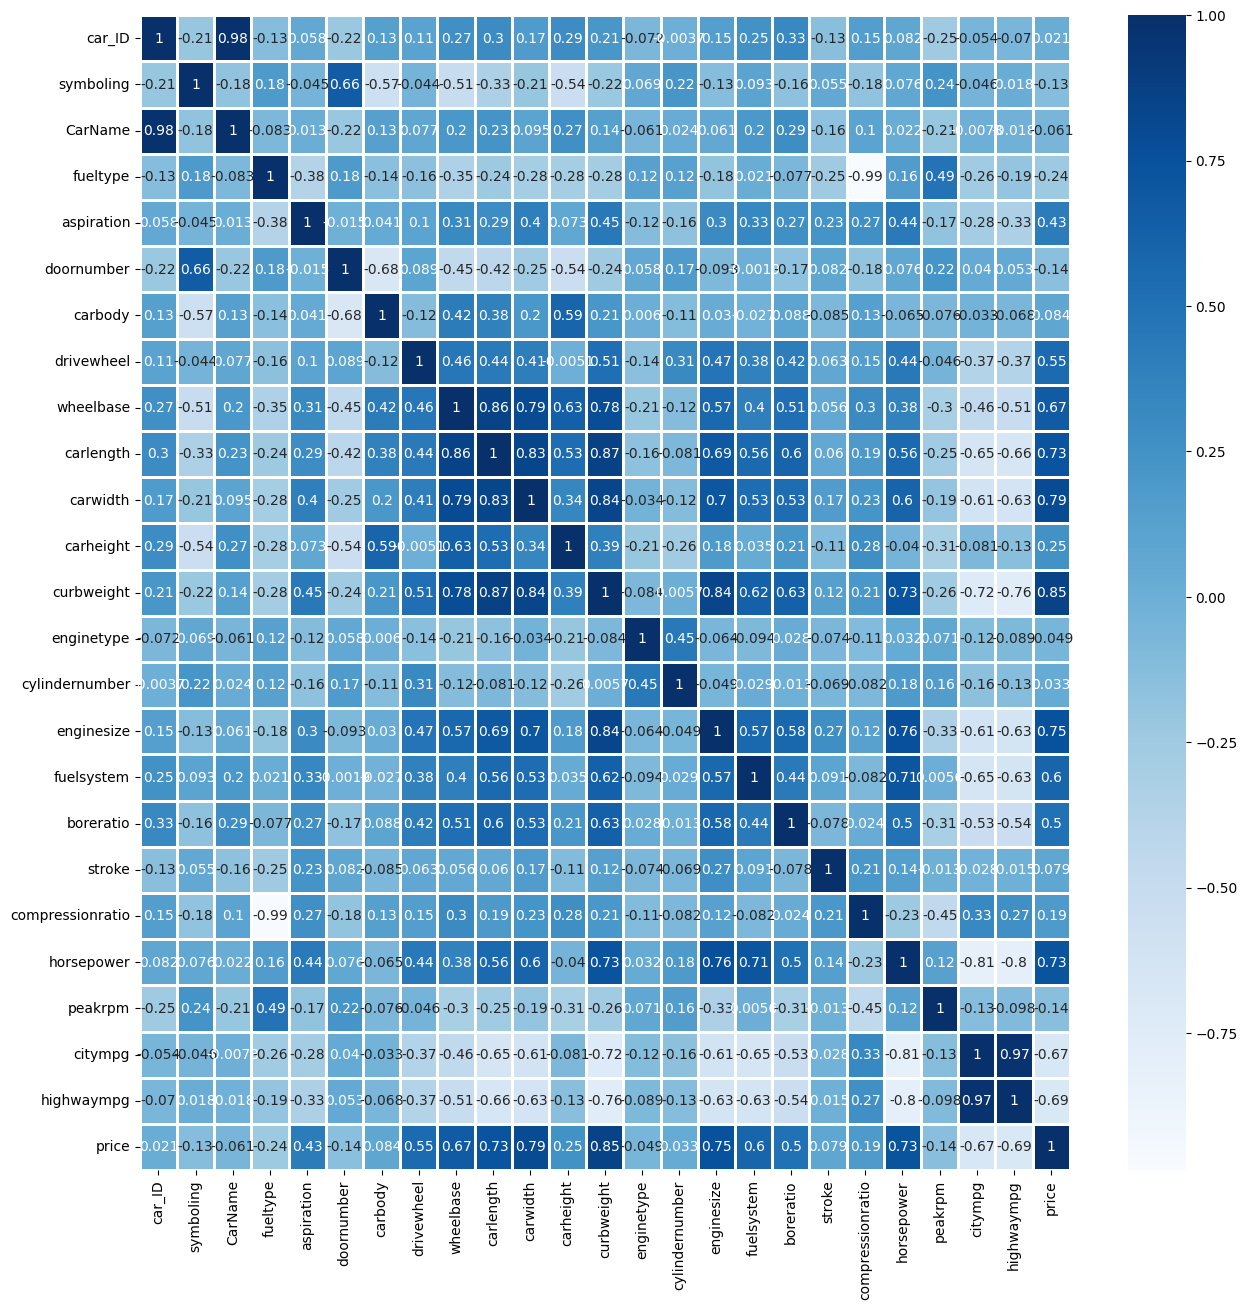

In [66]:
plt.figure(figsize=(15,15))
sns.heatmap(df_new.corr(),annot=True,linewidth=1,cmap="Blues")

In [67]:
#SCALING
from sklearn.preprocessing import MinMaxScaler


# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df_corr)

# Transform the data
scaled_data = scaler.transform(df_corr)

# Print the scaled data
print(scaled_data.round(2))
df_corr[corr_columns]=scaled_data.round(2)
df_corr

[[1.   0.07 0.48 ... 0.15 0.21 0.36]
 [1.   0.07 0.48 ... 0.15 0.21 0.49]
 [1.   0.29 0.52 ... 0.09 0.18 0.49]
 ...
 [1.   0.82 0.83 ... 0.06 0.09 0.71]
 [1.   0.82 0.83 ... 0.3  0.21 0.75]
 [1.   0.82 0.83 ... 0.09 0.15 0.76]]


C:\Users\User\AppData\Local\Temp\ipykernel_8440\194933279.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[corr_columns]=scaled_data.round(2)


,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg,price
0,1.0,0.07,0.48,0.34,0.47,0.57,0.71,0.41,0.15,0.21,0.36
1,1.0,0.07,0.48,0.34,0.47,0.57,0.71,0.41,0.15,0.21,0.49
2,1.0,0.29,0.52,0.47,0.59,0.75,0.71,0.70,0.09,0.18,0.49
3,0.5,0.48,0.61,0.53,0.38,0.39,0.71,0.36,0.24,0.29,0.38
4,0.0,0.46,0.61,0.55,0.59,0.61,0.71,0.44,0.06,0.06,0.53
...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,0.82,0.83,0.77,0.65,0.66,0.71,0.43,0.21,0.24,0.51
201,1.0,0.82,0.83,0.77,0.69,0.66,0.71,0.74,0.09,0.15,0.60
202,1.0,0.82,0.83,0.77,0.67,0.92,0.71,0.57,0.06,0.09,0.71
203,1.0,0.82,0.83,0.77,0.76,0.69,0.43,0.38,0.30,0.21,0.75


In [70]:
#Linear Regression

features = ['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'horsepower', 'citympg', 'highwaympg']
X = df_corr[features]
Y = df_corr['price']
x_train,x_test,y_train,y_test,=train_test_split(X,Y,train_size=0.80)

In [71]:
x_train

,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg
85,0.5,0.35,0.54,0.46,0.39,0.50,0.14,0.26,0.27,0.35
142,0.5,0.38,0.53,0.46,0.31,0.39,0.14,0.22,0.36,0.38
147,0.5,0.38,0.56,0.46,0.43,0.39,0.71,0.30,0.27,0.32
158,0.5,0.33,0.44,0.37,0.35,0.40,0.43,0.05,0.55,0.47
184,0.5,0.39,0.53,0.47,0.34,0.30,0.43,0.03,0.64,0.76
...,...,...,...,...,...,...,...,...,...,...
169,1.0,0.43,0.61,0.48,0.47,0.70,0.71,0.45,0.24,0.29
32,0.5,0.26,0.15,0.33,0.15,0.15,0.00,0.08,0.67,0.65
131,0.5,0.34,0.62,0.57,0.43,0.58,0.71,0.28,0.21,0.32
5,0.5,0.48,0.63,0.54,0.45,0.61,0.71,0.41,0.09,0.15


In [72]:
x_test

,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg
0,1.0,0.07,0.48,0.34,0.47,0.57,0.71,0.41,0.15,0.21
161,0.5,0.33,0.44,0.37,0.28,0.30,0.14,0.14,0.36,0.41
44,0.5,0.29,0.26,0.30,0.17,0.24,0.14,0.14,0.67,0.68
166,1.0,0.29,0.48,0.33,0.36,0.30,0.71,0.42,0.30,0.26
33,0.5,0.26,0.15,0.33,0.20,0.25,0.00,0.18,0.42,0.41
115,1.0,0.77,0.79,0.73,0.70,0.48,0.71,0.32,0.09,0.12
75,1.0,0.58,0.65,0.69,0.63,0.65,0.71,0.84,0.09,0.12
96,0.5,0.29,0.42,0.32,0.21,0.30,0.14,0.14,0.45,0.50
151,0.5,0.33,0.30,0.30,0.24,0.25,0.14,0.09,0.45,0.53
88,0.5,0.35,0.54,0.46,0.40,0.40,0.86,0.45,0.21,0.29


In [73]:
reg=LinearRegression()

In [74]:
reg.fit(x_train,y_train)

LinearRegression()

In [76]:
pred=reg.predict(x_test)
pred

array([0.26934324, 0.1073536 , 0.05126322, 0.22455522, 0.10695965,
       0.55799575, 0.59656342, 0.04209651, 0.08590262, 0.25741663,
       0.4213675 , 0.52628456, 0.04345636, 0.61425984, 0.5860594 ,
       0.25741663, 0.54386852, 0.41657541, 0.0420958 , 0.1057208 ,
       0.32780557, 0.10986394, 0.07753523, 0.61543834, 0.04314443,
       0.45668558, 0.23952532, 0.3419328 , 0.53701629, 0.54538459,
       0.32716595, 0.16080356, 0.18036492, 0.74983081, 0.25982403,
       0.2324617 , 0.04550734, 0.46076064])

In [77]:
x_test.loc[0]

drivewheel    1.00
wheelbase     0.07
carlength     0.48
carwidth      0.34
curbweight    0.47
enginesize    0.57
fuelsystem    0.71
horsepower    0.41
citympg       0.15
highwaympg    0.21
Name: 0, dtype: float64

In [78]:
y_test.loc[0]

0.36

In [79]:
reg.coef_

array([ 0.08622288,  0.10576969, -0.24788747,  0.37017701,  0.70636152,
       -0.06081852,  0.0038807 ,  0.18952153, -0.06066539,  0.08255549])

In [80]:
reg.intercept_

-0.21717703524051996

In [81]:
reg.coef_*28.0+reg.intercept_

array([ 2.19706359,  2.74437427, -7.15802606, 10.14777919, 19.56094556,
       -1.92009573, -0.10851751,  5.08942588, -1.91580805,  2.09437659])

In [83]:
reg.score(x_test,y_test)

0.7389161941026839

In [86]:
#Random Forest


from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(x_train,y_train)
 

RandomForestRegressor()

In [87]:
y_pred1=rf.predict(x_test)
y_pred1

array([0.4334    , 0.1367    , 0.0646    , 0.24306667, 0.08984762,
       0.4189    , 0.521     , 0.08135429, 0.06640222, 0.20645   ,
       0.3697    , 0.5518    , 0.11495   , 0.51526667, 0.52616667,
       0.20645   , 0.413     , 0.40375   , 0.05014   , 0.113725  ,
       0.4031    , 0.10657333, 0.03784833, 0.54997333, 0.08095   ,
       0.3919    , 0.22814667, 0.4201    , 0.4196    , 0.6305    ,
       0.47183333, 0.2316    , 0.15236667, 0.9475    , 0.4255    ,
       0.18606   , 0.034875  , 0.4151    ])

In [102]:
r_score1=metrics.r2_score(y_test,y_pred1)
print("r score=",r_score1)

r score= 0.7832098645156442


In [89]:
#Support Vector Machine
from sklearn.svm import SVR 
SVM=SVR()
SVM.fit(x_train,y_train)

SVR()

In [90]:
y_pred2=SVM.predict(x_test)
y_pred2

array([0.3899045 , 0.09413603, 0.08772222, 0.28692953, 0.11022989,
       0.55052744, 0.46297367, 0.07496064, 0.08775486, 0.2692839 ,
       0.37125833, 0.50636393, 0.08495651, 0.57533685, 0.60393434,
       0.2692839 , 0.54686422, 0.56769322, 0.08521137, 0.19630993,
       0.39756932, 0.10133867, 0.08957272, 0.61843099, 0.1788342 ,
       0.39017133, 0.2090754 , 0.40526004, 0.40376679, 0.52875441,
       0.2634446 , 0.23540764, 0.12060777, 0.89966101, 0.39144462,
       0.20619386, 0.08128092, 0.45415926])

In [101]:
from sklearn import metrics
r_score2=metrics.r2_score(y_test,y_pred2)
print("r score=",r_score2)

r score= 0.7664135260353789


In [95]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [96]:
!pip install xgboost


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 99.7/99.7 MB 3.1 MB/s eta 0:00:00


In [111]:
#Decision Tree Regressor

DT=DecisionTreeRegressor(random_state = 0)  
DT.fit(x_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [112]:
y_pred = DT.predict(x_test) 
r_score4=DT.score(x_test,y_test)
print("r score=",r_score4)
print("The r2_score of our model is",round(r2_score(y_test, y_pred), 2) *100,"%")

r score= 0.5513848969836325
The r2_score of our model is 55.00000000000001 %


In [114]:
#Dimension Reductionality:Principal Component Analysis(PCA)
df_new

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,126,1,0,0,3,2,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,125,1,1,0,3,2,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,127,1,0,0,3,2,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,129,0,1,0,3,2,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [115]:
col=df_new.columns

from sklearn.preprocessing import MinMaxScaler


# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df_new)

# Transform the data
scaled_data = scaler.transform(df_new)

# Print the scaled data

df_new[col]=scaled_data.round(2)
df_new

C:\Users\User\AppData\Local\Temp\ipykernel_8440\2684573027.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col]=scaled_data.round(2)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.00,1.0,0.02,1.0,0.0,1.0,0.00,1.0,0.07,0.48,...,0.57,0.71,0.66,0.33,0.12,0.41,0.35,0.15,0.21,0.36
1,0.00,1.0,0.02,1.0,0.0,1.0,0.00,1.0,0.07,0.48,...,0.57,0.71,0.66,0.33,0.12,0.41,0.35,0.15,0.21,0.49
2,0.01,0.6,0.01,1.0,0.0,1.0,0.50,1.0,0.29,0.52,...,0.75,0.71,0.10,0.77,0.12,0.70,0.35,0.09,0.18,0.49
3,0.01,0.8,0.03,1.0,0.0,0.0,0.75,0.5,0.48,0.61,...,0.39,0.71,0.46,0.73,0.19,0.36,0.55,0.24,0.29,0.38
4,0.02,0.8,0.04,1.0,0.0,0.0,0.75,0.0,0.46,0.61,...,0.61,0.71,0.46,0.73,0.06,0.44,0.55,0.06,0.06,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.98,0.2,0.95,1.0,0.0,0.0,0.75,1.0,0.82,0.83,...,0.66,0.71,0.89,0.59,0.16,0.43,0.51,0.21,0.24,0.51
201,0.99,0.2,0.94,1.0,1.0,0.0,0.75,1.0,0.82,0.83,...,0.66,0.71,0.89,0.59,0.11,0.74,0.47,0.09,0.15,0.60
202,0.99,0.2,0.95,1.0,0.0,0.0,0.75,1.0,0.82,0.83,...,0.92,0.71,0.74,0.44,0.11,0.57,0.55,0.06,0.09,0.71
203,1.00,0.2,0.97,0.0,1.0,0.0,0.75,1.0,0.82,0.83,...,0.69,0.43,0.34,0.73,1.00,0.38,0.27,0.30,0.21,0.75


In [116]:
Y=df_new.price
df_new.drop(columns='price',inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8440\1038517203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns='price',inplace=True)


In [ ]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.34062746, -1.85997377, -0.34963645, ...,  0.43525853,
        -0.79500251, -0.68022053],
       [ 1.34062746, -1.85997377, -0.34963645, ...,  0.43525853,
        -0.79500251, -0.68022053],
       [ 1.34062746, -0.70440148, -0.14648377, ...,  1.89317616,
        -1.11412323, -0.83873471],
       ...,
       [ 1.34062746,  2.07947721,  1.42794947, ...,  1.23962688,
        -1.2736836 , -1.31427727],
       [ 1.34062746,  2.07947721,  1.42794947, ...,  0.28443946,
         0.0027993 , -0.68022053],
       [ 1.34062746,  2.07947721,  1.42794947, ...,  0.53580457,
        -1.11412323, -0.9972489 ]])

In [118]:
#Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [119]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.6464149 , 0.11479669, 0.09112414, 0.06231362, 0.04622829,
       0.01414328, 0.00969346, 0.00850182, 0.00531388, 0.00146991])

In [120]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
print(x_train)
print(x_test)

[[ 2.07773628e-01 -4.01981976e-02]
 [ 3.15997240e-01 -6.06798725e-02]
 [-4.32153069e-02  2.64534810e-01]
 [ 3.76591085e-01  3.15019248e-02]
 [ 4.65959191e-01 -6.50225261e-02]
 [ 1.39217161e-01 -8.96103849e-02]
 [-6.36759331e-01  1.69587319e-01]
 [-5.14693121e-01 -4.72657757e-01]
 [-1.95556414e-01  2.43733144e-01]
 [ 5.19112019e-01 -9.08587364e-02]
 [-6.73677304e-01  2.72104581e-01]
 [ 6.41657862e-01 -3.26827646e-02]
 [ 5.19672512e-02  2.35115489e-01]
 [ 5.38056171e-01 -6.82595422e-02]
 [-8.26569218e-01 -2.87533154e-01]
 [ 6.21832347e-02  2.38349597e-01]
 [-8.45458434e-01 -1.01426004e-01]
 [ 3.94111057e-01 -1.04055687e-01]
 [-1.07431707e-02 -1.76459024e-01]
 [-6.20160727e-01 -2.01227873e-01]
 [-1.07431707e-02 -1.76459024e-01]
 [ 2.00962972e-01 -4.23542699e-02]
 [ 1.56893164e-01  3.76436959e-01]
 [-1.31468348e-01  1.83528488e-01]
 [-4.72776280e-01 -1.27793551e-01]
 [ 7.63269290e-01 -1.06008787e-01]
 [ 1.76441774e-01 -4.85241923e-02]
 [ 6.04094387e-01 -2.72577344e-02]
 [-4.34642169e-02  6

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor


KNN= KNeighborsRegressor()
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [125]:
y_pred3=KNN.predict(x_test)
y_pred3

array([0.38 , 0.124, 0.06 , 0.316, 0.05 , 0.422, 0.532, 0.098, 0.072,
       0.264, 0.45 , 0.474, 0.104, 0.52 , 0.56 , 0.264, 0.422, 0.546,
       0.05 , 0.09 , 0.344, 0.078, 0.068, 0.754, 0.044, 0.45 , 0.192,
       0.344, 0.554, 0.58 , 0.114, 0.158, 0.15 , 0.668, 0.31 , 0.192,
       0.06 , 0.554])

In [126]:
r_score3=metrics.r2_score(y_test,y_pred3)
print("r score=",r_score3)

r score= 0.7519658729918615
